In [2]:
import os 
import sys
# Get the parent directory
parent_dir = os.path.dirname(os.path.realpath(os.getcwd()))
# Add the parent directory to sys.path
sys.path.append(parent_dir)

from latent_analysis import utils
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from latent_analysis import LTransform as LT

In [3]:
data_path = "../datasets/000129/sub-Indy/sub-Indy_desc-train_behavior+ecephys.nwb"
D, trial_info, units = utils.read_mc_rtt(data_path)
trial_info = trial_info.reset_index(inplace=False, drop=True)
trial_info = trial_info.drop(index=0)

tools = utils.Analysis_tools(fs = 1000)

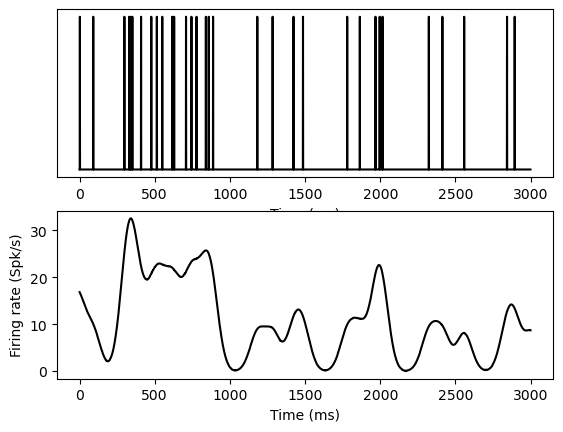

In [4]:
which_unit = 203
t = [1, 4]

t_pad = 0.5 # Seconds
dt = 1/1000

plt.subplot(2,1,1)
stem = tools.get_stem(units, which_unit, t, plot=True, dt=dt, t_pad=t_pad)
plt.subplot(2,1,2)
fr = tools.get_fr(which_unit, units, t, plot=True, dt=dt, t_pad=t_pad)

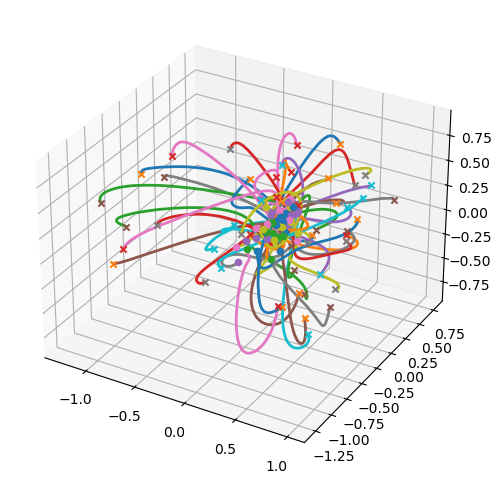

In [5]:
%matplotlib inline  
condition_columns = [('to_target', 'id')]
align_column = 'start_time'
#unit = [2561, 1011]
unit = units.index.values
t_range = [-10, 300]
data_aligned = tools.align_fr(trial_info, units, condition_columns, align_column, unit, t_range)

n_mean = np.mean(data_aligned, axis=0, keepdims=True)
n_range = np.max(np.vstack(data_aligned), axis=0, keepdims=True) - np.min(np.vstack(data_aligned), axis=0, keepdims=True)

rate_scaled = (data_aligned - n_mean)/(n_range+5)
transform = LT.Transform(num_latent=3)
transform.fit(rate_scaled, method='FA')
X_ld = transform.transform(rate_scaled, ensure_orthogonality=True)


fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
for c in range(52):
    ax.plot(X_ld[c, :, 0], X_ld[c,:, 1], X_ld[c,:, 2], lw=2, )
    ax.scatter(X_ld[c,0, 0], X_ld[c,0, 1], X_ld[c,0, 2])
    ax.scatter(X_ld[c,-1, 0], X_ld[c,-1, 1], X_ld[c,-1, 2], marker = 'x')

Text(0.5, 0, 'Time (ms)')

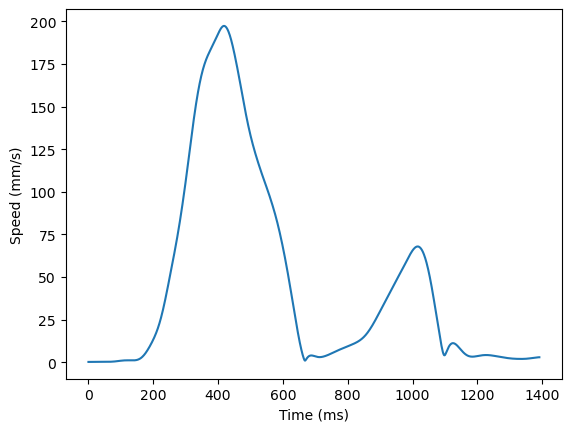

In [6]:
%matplotlib inline
tr = 6
t1 = int(trial_info.loc[tr]['start_time'].values*1000)
t2 = int(trial_info.loc[tr]['end_time'].values*1000)
spd = np.sqrt(D['finger_vel'][t1:t2]['x']**2 + D['finger_vel'][t1:t2]['y']**2).values
plt.plot(spd)
plt.ylabel('Speed (mm/s)')
plt.xlabel('Time (ms)')